# Assignment 12.2
## DSC 530: DATA EXPLORATION AND ANALYSIS
## Term Project - VIDEO GAMES SALES Analysis 
## Author - Amita Shah
## Instructor - Cary Jim  
## Date - 02/22/2024

In [1]:
# import libraries numpy, pandas,requests and random 
import numpy as np
import pandas as pd
import random
import requests

# import os path for file processing
from os.path import basename, exists

# import scipy.stats as stats
import scipy.stats as stats

# download method for downloading the file from URL
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)



def downloadcsv(url):
    filename = basename(url)
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Write the content to a file
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"Failed to download the CSV file. Status code: {response.status_code}")



In [2]:
# Download the author's codebase for ThinkStats2 and ThinkPlot.
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

# Import author's files ThinkStats2 and ThinkPlot.
import thinkstats2
import thinkplot

# Download My data analysis
# Correct URL for the raw content of the CSV file
raw_url = "https://raw.githubusercontent.com/amita057/DSA-TermProject/main/dataset/vgsales.csv"

# Use the downloadcsv function to download the CSV file
downloadcsv(raw_url)

Downloaded vgsales.csv


In [3]:
# Now, you should be able to read the CSV file correctly
try:
    video_game_sales = pd.read_csv('vgsales.csv')
    print(video_game_sales.head())  # Display the first few rows to verify
except Exception as e:
    print(f"Error reading the CSV file: {e}")

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


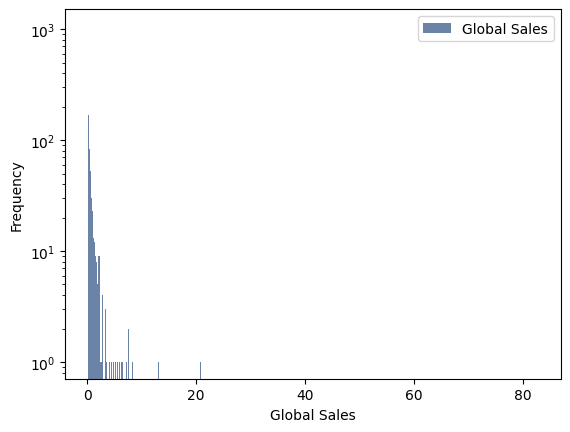

In [4]:
# Histogram of Global Sales
hist_global_sales = thinkstats2.Hist(video_game_sales.Global_Sales, label='Global Sales')
thinkplot.Hist(hist_global_sales)
thinkplot.Config(xlabel='Global Sales', ylabel='Frequency', yscale='log') 

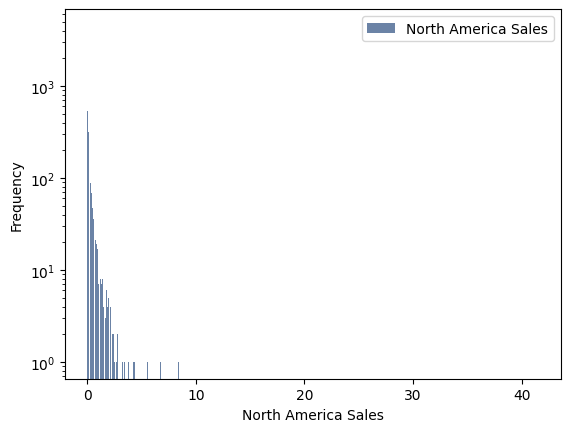

In [5]:
# Histogram of North America Sales
hist_na_sales = thinkstats2.Hist(video_game_sales.NA_Sales, label='North America Sales')
thinkplot.Hist(hist_na_sales)
thinkplot.Config(xlabel='North America Sales', ylabel='Frequency', yscale='log') 

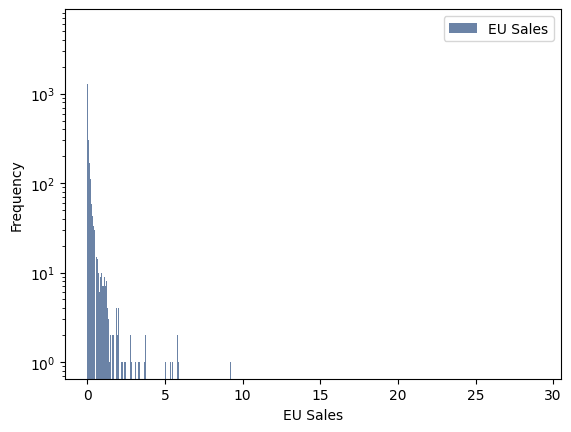

In [6]:
# Histogram of EU Sales
hist_eu_sales = thinkstats2.Hist(video_game_sales.EU_Sales, label='EU Sales')
thinkplot.Hist(hist_eu_sales)
thinkplot.Config(xlabel='EU Sales', ylabel='Frequency', yscale='log') 

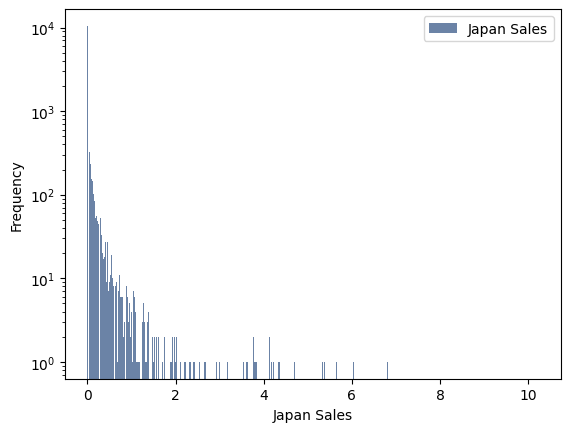

In [7]:
# Histogram of Japan Sales
hist_jp_sales = thinkstats2.Hist(video_game_sales.JP_Sales, label='Japan Sales')
thinkplot.Hist(hist_jp_sales)
thinkplot.Config(xlabel='Japan Sales', ylabel='Frequency', yscale='log') 

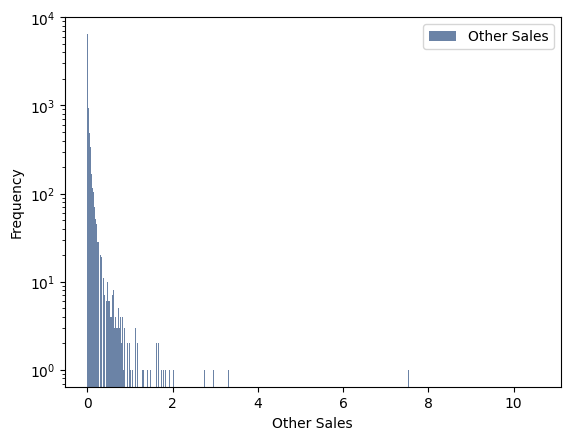

In [8]:
# Histogram of Other region Sales
hist_other_sales = thinkstats2.Hist(video_game_sales.Other_Sales, label='Other Sales')
thinkplot.Hist(hist_other_sales)
thinkplot.Config(xlabel='Other Sales', ylabel='Frequency', yscale='log') 

In [9]:
def DiscriptiveAnalysis(df, region):
    mean = df.mean()
    mode = df.mode()[0]
    spread = df.max() - df.min()
    min = df.min()
    max = df.max()
    
    print(f"{region} Sales Analysis")
    print(f"Mean: {mean}")
    print(f"Mode: {mode}")
    print(f"Spread: {spread}")
    print(f"Min: {min}")
    print(f"Max: {max}\n")

DiscriptiveAnalysis(video_game_sales['NA_Sales'], "North America")
DiscriptiveAnalysis(video_game_sales['EU_Sales'], "North America")
DiscriptiveAnalysis(video_game_sales['JP_Sales'], "North America")
DiscriptiveAnalysis(video_game_sales['Other_Sales'], "North America")
DiscriptiveAnalysis(video_game_sales['Global_Sales'], "North America")

North America Sales Analysis
Mean: 0.26466742981082064
Mode: 0.0
Spread: 41.49
Min: 0.0
Max: 41.49

North America Sales Analysis
Mean: 0.14665200626581515
Mode: 0.0
Spread: 29.02
Min: 0.0
Max: 29.02

North America Sales Analysis
Mean: 0.077781660441017
Mode: 0.0
Spread: 10.22
Min: 0.0
Max: 10.22

North America Sales Analysis
Mean: 0.0480630196409206
Mode: 0.0
Spread: 10.57
Min: 0.0
Max: 10.57

North America Sales Analysis
Mean: 0.5374406555006628
Mode: 0.02
Spread: 82.72999999999999
Min: 0.01
Max: 82.74



In [10]:
# Filter the dataset for games released before and after the year 2000
games_before_2000 = video_game_sales[video_game_sales['Year'] < 2000]
games_after_2000 = video_game_sales[video_game_sales['Year'] >= 2000]

In [11]:
# Create PMFs for Global_Sales for games before and after 2000
pmf_before_2000 = thinkstats2.Pmf(games_before_2000['Global_Sales'], label='Before 2000')
pmf_after_2000 = thinkstats2.Pmf(games_after_2000['Global_Sales'], label='After 2000')

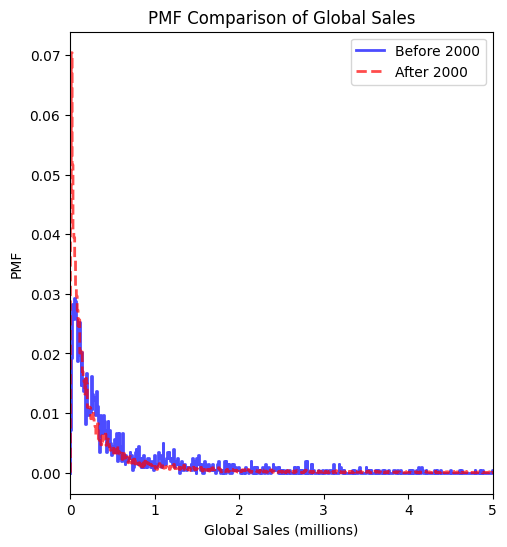

<Figure size 800x600 with 0 Axes>

In [12]:
# Plot PMFs

# Set plot size for better visibility
thinkplot.PrePlot(2, cols=2)

# For games before 2000, use a solid blue line
thinkplot.Pmf(pmf_before_2000, style='-', color='blue', linewidth=2)

# For games after 2000, use a dashed red line
thinkplot.Pmf(pmf_after_2000, style='--', color='red', linewidth=2)

thinkplot.Config(xlabel='Global Sales (millions)',
                 ylabel='PMF',
                 title='PMF Comparison of Global Sales',
                 xlim=[0, 5]) 

# Add a legend to clarify which line corresponds to which scenario
thinkplot.Show(legend=True)

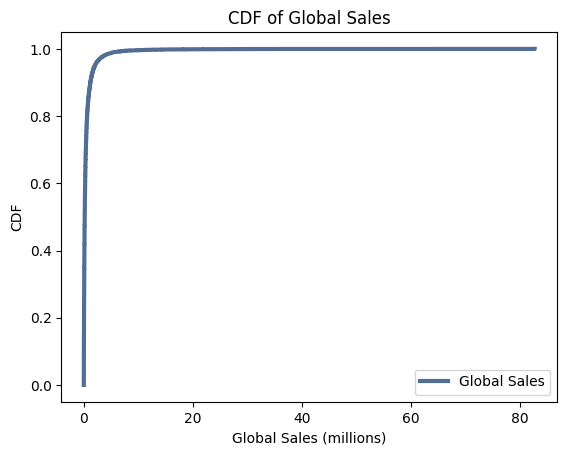

In [13]:
# Create the CDF for Global Sales
cdf_global_sales = thinkstats2.Cdf(video_game_sales['Global_Sales'], label='Global Sales')

# Plotting the CDF
thinkplot.Cdf(cdf_global_sales)
thinkplot.Config(xlabel='Global Sales (millions)', ylabel='CDF', title='CDF of Global Sales')

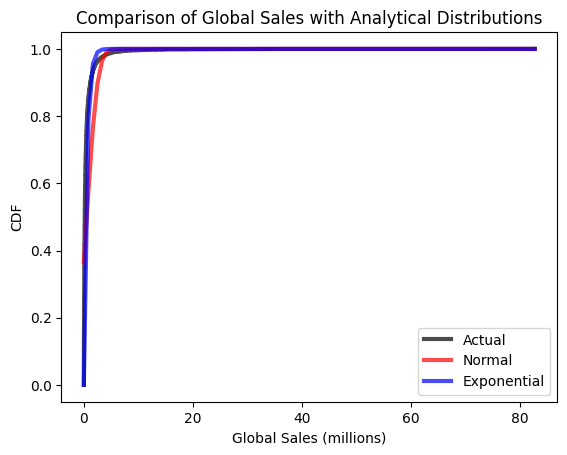

In [14]:
# Calculate mean and standard deviation for Global_Sales
mean, std = video_game_sales['Global_Sales'].mean(), video_game_sales['Global_Sales'].std()

# Generate a normal distribution with the same mean and std
normal_dist = stats.norm(loc=mean, scale=std)

# Calculate rate parameter as reciprocal of the mean
lambda_param = 1 / mean

# Generate an exponential distribution with the calculated rate
exponential_dist = stats.expon(scale=1/lambda_param)

# Create the CDF from the actual data
cdf_global_sales = thinkstats2.Cdf(video_game_sales['Global_Sales'], label='Actual')

# Generate a range of values to plot the theoretical distributions
xs = np.linspace(0, video_game_sales['Global_Sales'].max(), 100)

# Plot the actual CDF
thinkplot.Cdf(cdf_global_sales, color='black')

# Plot the CDF of the normal distribution
thinkplot.Plot(xs, [normal_dist.cdf(x) for x in xs], label='Normal', color='red')

# Plot the CDF of the exponential distribution
thinkplot.Plot(xs, [exponential_dist.cdf(x) for x in xs], label='Exponential', color='blue')

thinkplot.Config(title='Comparison of Global Sales with Analytical Distributions',
                 xlabel='Global Sales (millions)',
                 ylabel='CDF')

Pearson's correlation (Global vs. NA): 0.941


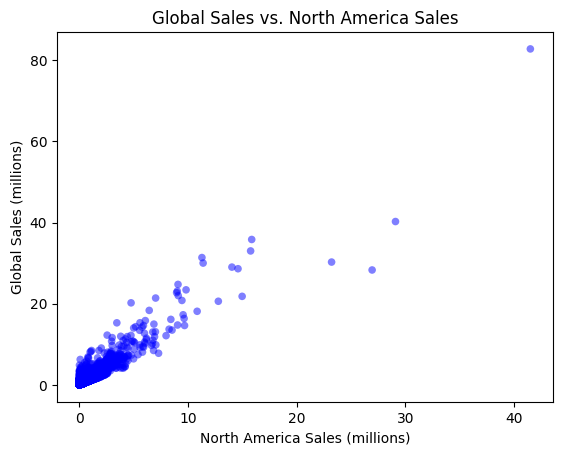

In [15]:
# Scatter plot for Global Sales vs. North America Sales
thinkplot.Scatter(video_game_sales['NA_Sales'], video_game_sales['Global_Sales'], alpha=0.5)
thinkplot.Config(title='Global Sales vs. North America Sales',
                 xlabel='North America Sales (millions)',
                 ylabel='Global Sales (millions)',
                 legend=False)

# Calculate Pearson's correlation coefficient for Global vs. NA Sales
pearson_correlation_na_global = np.corrcoef(video_game_sales['NA_Sales'], video_game_sales['Global_Sales'])[0, 1]
print(f"Pearson's correlation (Global vs. NA): {pearson_correlation_na_global:.3f}")

Pearson's correlation (Global vs. Year): -0.075


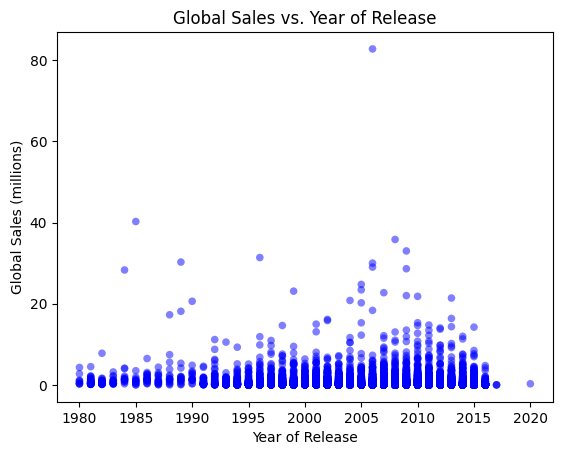

In [16]:
# Scatter plot for Global Sales vs. Year of Release
thinkplot.Scatter(video_game_sales['Year'], video_game_sales['Global_Sales'], alpha=0.5)
thinkplot.Config(title='Global Sales vs. Year of Release',
                 xlabel='Year of Release',
                 ylabel='Global Sales (millions)',
                 legend=False)

# Calculate Pearson's correlation coefficient for Global Sales vs. Year of Release
# Note: We need to handle NaN values in 'Year' for accurate calculation
pearson_correlation_year_global = np.corrcoef(video_game_sales.dropna(subset=['Year'])['Year'], video_game_sales.dropna(subset=['Year'])['Global_Sales'])[0, 1]
print(f"Pearson's correlation (Global vs. Year): {pearson_correlation_year_global:.3f}")

In [17]:
from scipy import stats

# Split the dataset into two groups
before_2000 = video_game_sales[video_game_sales['Year'] <= 2000]['Global_Sales']
after_2000 = video_game_sales[video_game_sales['Year'] > 2000]['Global_Sales']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(after_2000, before_2000, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -7.056243310317059
P-value: 2.1522899435137467e-12


In [18]:
import statsmodels.api as sm

# Simple Linear Regression: Global_Sales ~ NA_Sales
X = video_game_sales['NA_Sales']
y = video_game_sales['Global_Sales']

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the regression model
model_simple = sm.OLS(y, X, missing='drop').fit()

# Print the summary of the regression model
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.284e+05
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:56:35   Log-Likelihood:                -12888.
No. Observations:               16598   AIC:                         2.578e+04
Df Residuals:                   16596   BIC:                         2.580e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0632      0.004     14.725      0.0

In [19]:
# Multiple Linear Regression: Global_Sales ~ NA_Sales + EU_Sales + JP_Sales + Other_Sales
X_multi = video_game_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y_multi = video_game_sales['Global_Sales']

# Add a constant to the model (the intercept)
X_multi = sm.add_constant(X_multi)

# Fit the regression model
model_multi = sm.OLS(y_multi, X_multi, missing='drop').fit()

# Print the summary of the regression model
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.679e+08
Date:                Fri, 23 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:56:35   Log-Likelihood:                 63671.
No. Observations:               16598   AIC:                        -1.273e+05
Df Residuals:                   16593   BIC:                        -1.273e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0003    4.3e-05      7.517      